# Asteroid Dataset

Dataset ini berisi 30 ribu data objek asteroid, sedangkan versi orisinil (berukuran lebih dari 100 MB) menampung lebih dari 800
ribu data objek asteroid. Sebagian objek di kedua dataset itu adalah asteroid dekat Bumi
(NEO, Near Earth Object).

## Basic Column Definition

- fullname: Object full name/designation (__object__)
- a: Semi-major axis au Unit
- e: Eccentricity
- g: Magnitude slope parameter 
- i: Inclination; angle with respect to x-y ecliptic plane
- om: Longitude of the ascending node
- w: Argument of perihelion
- q: perihelion distance(au)
- ad: aphelion distance(au)
- per_y: orbital_period
- data_arc: data arc-span(d)
- condition_code: Orbit Condition Code
- n_observation_used: Number of Observation Used
- H: Absolute magnitude parameter
- diameter: object diameter (from equivalent sphere) km Unit
- extent: Object bi/tri axial ellipsoid dimensions(Km)
- Albedo: Geometric albedo
- rot_per: Rotation Period(h)
- GM: Standard gravitational parameter, Product of mass and gravitational constant
- BV: B - V
- UB: U - B
- IR: I - R
- spec_B: Spectral taxonomic type(SMASSII)(__object__)
- spec_T: Spectral taxonomic type(Tholen) (__object__)
- NEO: Near-Earth Object (NEO) flag (__object__)
- PHA: Potentially Hazardous Asteroid (PHA) flag (__object__)
- moid: Earth Minimum Orbit Intersection Distance(au)

# Preprocessing Data
## Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_asteroid = pd.read_csv("C:/Users/Acer/Downloads/Dataset_DataScience/Asteroid/AsteroidCut30k.csv", delimiter=",")
for column in data_asteroid.columns:
    print(column, '/t', data_asteroid[column].unique()[:3])

full_name /t ['     1 Ceres' '     2 Pallas' '     3 Juno']
a /t [2.76916515 2.77246592 2.66914952]
e /t [0.07600903 0.23033682 0.25694232]
G /t [0.12 0.11 0.32]
i /t [10.59406704 34.83623442 12.98891913]
om /t [ 80.30553157 173.08006275 169.85275981]
w /t [ 73.59769412 310.04885743 248.13862618]
q /t [2.5586836  2.13386493 1.98333205]
ad /t [2.97964671 3.41106691 3.35496699]
per_y /t [4.6082018  4.61644353 4.36081392]
data_arc /t [ 8822 72318 72684]
condition_code /t [0 2 1]
n_obs_used /t [1002 8490 7104]
H /t [3.34 4.13 5.33]
diameter /t ['939.4' '545' '246.596']
extent /t ['964.4 x 964.2 x 891.8' '582x556x500' nan]
albedo /t [0.09  0.101 0.214]
rot_per /t [9.07417 7.8132  7.21   ]
GM /t [62.6284 14.3        nan]
BV /t [0.713 0.635 0.824]
UB /t [0.426 0.284 0.433]
IR /t [nan]
spec_B /t ['C' 'B' 'Sk']
spec_T /t ['G' 'B' 'S']
neo /t ['N' 'Y']
pha /t ['N' 'Y']
moid /t [1.59478 1.23324 1.03454]


In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
data_asteroid.head(100)

,full_name,a,e,G,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822,0,1002,3.34,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.594780
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318,0,8490,4.13,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.233240
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684,0,7104,5.33,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.034540
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288,0,9325,3.20,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.139480
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431,0,2861,6.85,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.095890
5,6 Hebe,2.425160,0.203007,0.24,14.737901,138.640203,239.807490,1.932835,2.917485,3.776755,62329,0,6034,5.71,185.18,NaN,0.2679,7.274500,NaN,0.822,0.399,NaN,S,S,N,N,0.973965
6,7 Iris,2.385334,0.231206,NaN,5.523651,259.563231,145.265106,1.833831,2.936837,3.684105,62452,0,5206,5.51,199.83,NaN,0.2766,7.139000,NaN,0.855,0.484,NaN,S,S,N,N,0.846100
7,8 Flora,2.201764,0.156499,0.28,5.886955,110.889330,285.287462,1.857190,2.546339,3.267115,62655,0,2744,6.49,147.491,NaN,0.2260,12.865000,NaN,0.885,0.489,NaN,NaN,S,N,N,0.874176
8,9 Metis,2.385637,0.123114,0.17,5.576816,68.908577,6.417369,2.091931,2.679342,3.684806,61821,0,2649,6.28,190,NaN,0.1180,5.079000,NaN,0.858,0.496,NaN,NaN,S,N,N,1.106910
9,10 Hygiea,3.141539,0.112461,NaN,3.831560,283.202167,312.315206,2.788240,3.494839,5.568291,62175,0,3409,5.43,407.12,NaN,0.0717,27.630000,7.0000,0.696,0.351,NaN,C,C,N,N,1.778390


## Check Info Data

In [3]:
print("Info about this data: {}".format(data_asteroid.info()))
print("\nShape of this data: {}".format(data_asteroid.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   full_name       30000 non-null  object 
 1   a               30000 non-null  float64
 2   e               30000 non-null  float64
 3   G               115 non-null    float64
 4   i               30000 non-null  float64
 5   om              30000 non-null  float64
 6   w               30000 non-null  float64
 7   q               30000 non-null  float64
 8   ad              30000 non-null  float64
 9   per_y           30000 non-null  float64
 10  data_arc        30000 non-null  int64  
 11  condition_code  30000 non-null  int64  
 12  n_obs_used      30000 non-null  int64  
 13  H               30000 non-null  float64
 14  diameter        22614 non-null  object 
 15  extent          15 non-null     object 
 16  albedo          22596 non-null  float64
 17  rot_per         8261 non-null  

In [4]:
data_asteroid["diameter"] = data_asteroid["diameter"].astype('float64')
data_asteroid.dtypes

full_name          object
a                 float64
e                 float64
G                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc            int64
condition_code      int64
n_obs_used          int64
H                 float64
diameter          float64
extent             object
albedo            float64
rot_per           float64
GM                float64
BV                float64
UB                float64
IR                float64
spec_B             object
spec_T             object
neo                object
pha                object
moid              float64
dtype: object

## Handling Missing Data

In [5]:
# Mengecek nilai yang kosong pada dataset
print("Total Missing Data in Each Column:\n{}".format(data_asteroid.isnull().sum()))
print("\nTotal Missing Data from Each Column: {}".format(data_asteroid.isnull().values.sum()))

Total Missing Data in Each Column:
full_name             0
a                     0
e                     0
G                 29885
i                     0
om                    0
w                     0
q                     0
ad                    0
per_y                 0
data_arc              0
condition_code        0
n_obs_used            0
H                     0
diameter           7386
extent            29985
albedo             7404
rot_per           21739
GM                29988
BV                28982
UB                29024
IR                30000
spec_B            28546
spec_T            29024
neo                   0
pha                   0
moid                  0
dtype: int64

Total Missing Data from Each Column: 271963


<AxesSubplot:>

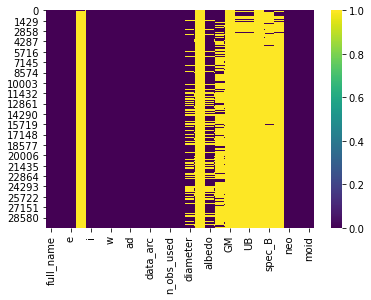

In [6]:
sns.heatmap(data_asteroid.isnull(), cmap='viridis')

### Delete some columns where almost all of the values are NaN.

In [7]:
#Delete this data because has missing value more than 70%: G, extent, rot_per, GM, , UB, IR, spef_B, spec_T
#tooMuchNa = data_asteroid.columns[data_asteroid.isna().sum()/data_asteroid.shape[0] > 0.7]
#data_asteroid = data_asteroid.drop(tooMuchNa,axis=1)
#data_asteroid = data_asteroid.drop(['condition_code','full_name'],axis=1)
#data_asteroid = data_asteroid.drop(['neo','pha'],axis=1)

data_asteroid = data_asteroid.drop(columns=['full_name', 'G', 'condition_code', 'extent', 'rot_per', 'GM', 'BV', 
                                            'UB', 'IR', 'spec_B', 'spec_T', 'neo', 'pha'])

print(data_asteroid.shape)
data_asteroid.head(10)

(30000, 14)


,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,diameter,albedo,moid
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822,1002,3.34,939.400,0.0900,1.594780
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318,8490,4.13,545.000,0.1010,1.233240
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684,7104,5.33,246.596,0.2140,1.034540
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288,9325,3.20,525.400,0.4228,1.139480
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431,2861,6.85,106.699,0.2740,1.095890
5,2.425160,0.203007,14.737901,138.640203,239.807490,1.932835,2.917485,3.776755,62329,6034,5.71,185.180,0.2679,0.973965
6,2.385334,0.231206,5.523651,259.563231,145.265106,1.833831,2.936837,3.684105,62452,5206,5.51,199.830,0.2766,0.846100
7,2.201764,0.156499,5.886955,110.889330,285.287462,1.857190,2.546339,3.267115,62655,2744,6.49,147.491,0.2260,0.874176
8,2.385637,0.123114,5.576816,68.908577,6.417369,2.091931,2.679342,3.684806,61821,2649,6.28,190.000,0.1180,1.106910
9,3.141539,0.112461,3.831560,283.202167,312.315206,2.788240,3.494839,5.568291,62175,3409,5.43,407.120,0.0717,1.778390


<AxesSubplot:>

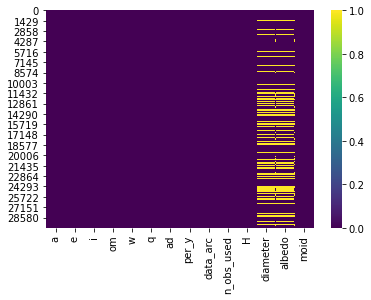

In [8]:
sns.heatmap(data_asteroid.isnull(), cmap='viridis')

In [9]:
# Mengecek nilai yang kosong pada dataset
print("Total Missing Data in Each Column: {}".format(data_asteroid.isnull().sum()))
print("\nTotal Missing Data from Each Column: {}".format(data_asteroid.isnull().values.sum()))

Total Missing Data in Each Column: a                0
e                0
i                0
om               0
w                0
q                0
ad               0
per_y            0
data_arc         0
n_obs_used       0
H                0
diameter      7386
albedo        7404
moid             0
dtype: int64

Total Missing Data from Each Column: 14790


## Fill NaN values of diameter and albedo columns with .mean()

In [10]:
data_asteroid['diameter'].fillna(data_asteroid['diameter'].mean(), inplace=True)
data_asteroid['albedo'].fillna(data_asteroid['albedo'].mean(), inplace=True)

In [11]:
data_asteroid.isnull().sum()

a             0
e             0
i             0
om            0
w             0
q             0
ad            0
per_y         0
data_arc      0
n_obs_used    0
H             0
diameter      0
albedo        0
moid          0
dtype: int64

In [12]:
data_asteroid.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,diameter,albedo,moid
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2.715211,0.140213,7.515249,168.664092,183.530520,2.333125,3.097298,4.738474,16558.428500,1532.341900,13.655886,11.607913,0.200997,1.343788
std,1.537870,0.074048,5.781773,99.909571,103.372927,1.091264,2.154084,11.839195,8466.667606,518.919607,1.420454,18.362790,0.114002,1.089919
min,0.832030,0.001003,0.042710,0.000735,0.011874,0.139981,1.143439,0.758956,551.000000,23.000000,3.200000,0.300000,0.005000,0.000166
25%,2.349733,0.088906,3.243661,86.954251,94.865657,1.985331,2.697171,3.601936,10221.000000,1167.000000,13.000000,4.716000,0.108000,0.990075
50%,2.594710,0.134084,5.967084,162.028727,186.224414,2.201596,2.957659,4.179664,14097.000000,1484.000000,13.900000,8.943500,0.200997,1.213555
75%,2.941338,0.180925,10.479288,243.938667,272.919382,2.606377,3.271034,5.044588,21411.000000,1841.000000,14.600000,11.607913,0.255000,1.612577
max,95.078032,0.899507,160.428272,359.976179,359.988886,41.922129,177.922617,927.104046,72684.000000,9325.000000,20.700000,939.400000,1.000000,40.907200


In [13]:
#plt.figure()
#sns.pairplot(data_asteroid)
#plt.show()

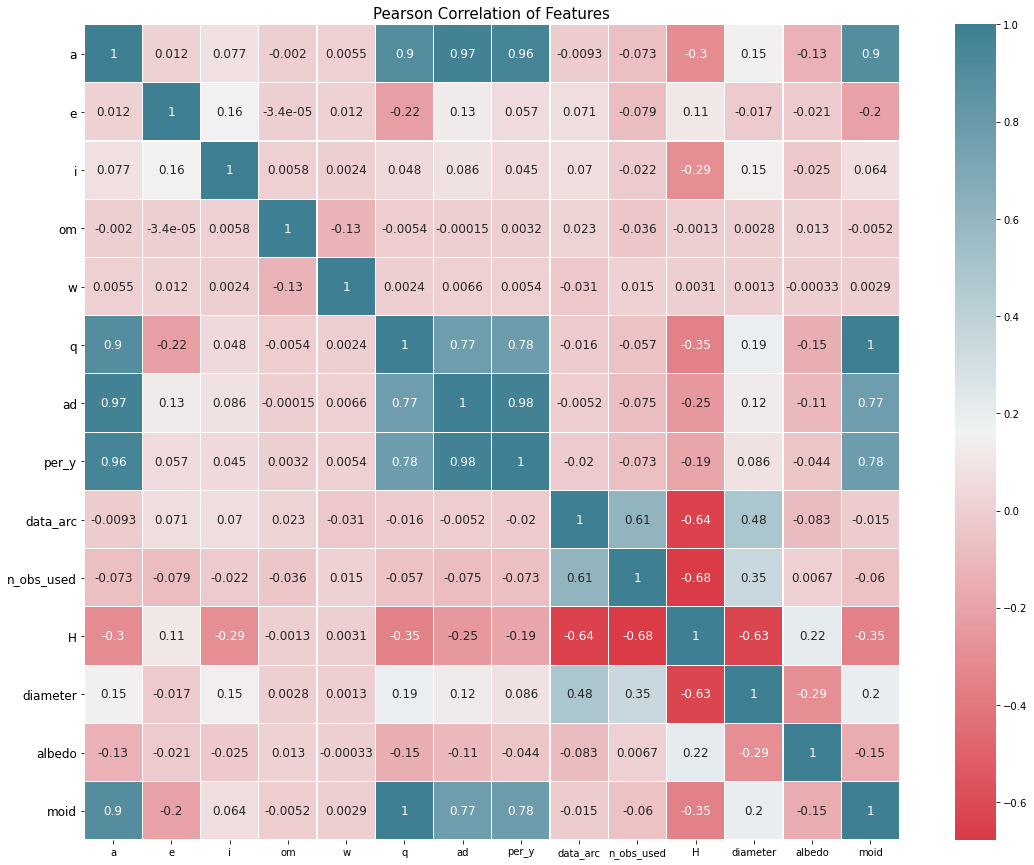

In [14]:
plt.figure(figsize=(20,15))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
g = sns.heatmap(data_asteroid.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12)
plt.show()

In [15]:
data_asteroid.corr()['diameter'].sort_values(ascending=False)

diameter      1.000000
data_arc      0.482600
n_obs_used    0.351235
moid          0.195041
q             0.193260
a             0.154447
i             0.145464
ad            0.122623
per_y         0.086422
om            0.002841
w             0.001314
e            -0.016518
albedo       -0.285243
H            -0.629461
Name: diameter, dtype: float64

# Standarisasi

In [16]:
#Split Data into features and target
y = data_asteroid['diameter']
X = data_asteroid.drop(['diameter'],axis = 1)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
     ('std_scaler', StandardScaler()),
    # Add as many as you can
])

In [18]:
X_std = my_pipeline.fit_transform(X)

In [19]:
X_std.shape

(30000, 13)

# Split Data into Training set and Test Set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 0)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model_linreg = LinearRegression()
model_dtr = DecisionTreeRegressor()
model_rfr = RandomForestRegressor()

In [32]:
model_linreg.fit(X_train, y_train)
model_dtr.fit(X_train, y_train)
model_rfr.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
model_linreg.predict(X_test)
model_dtr.predict(X_test)
model_rfr.predict(X_test)

array([12.73241, 17.50027, 14.28474, ..., 26.2288 , 10.40414,  5.46306])

In [34]:
from sklearn.metrics import mean_squared_error

# Melakukan prediksi menggunakan algoritma linear regression 
diameterPrediction_linreg  = model_linreg.predict(X_test)
lin_mse_linreg = mean_squared_error(y_test, diameterPrediction_linreg)
lin_mse_linreg = np.sqrt(lin_mse_linreg)

# Melakukan prediksi menggunakan algoritma decision tree regressor
diameterPrediction_dtr  = model_dtr.predict(X_test)
lin_mse_dtr = mean_squared_error(y_test, diameterPrediction_dtr)
lin_mse_dtr = np.sqrt(lin_mse_dtr)

# Melakukan prediksi menggunakan algoritma random forest regressor
diameterPrediction_rfr  = model_rfr.predict(X_test)
lin_mse_rfr = mean_squared_error(y_test, diameterPrediction_rfr)
lin_mse_rfr = np.sqrt(lin_mse_rfr)

In [35]:
print("mean squared error (MSE) of Linear Regression=", lin_mse_linreg)
print("mean squared error (MSE) of Decision Tree Classifier=", lin_mse_dtr)
print("mean squared error (MSE) of Random Forest Regressor:", lin_mse_rfr)

mean squared error (MSE) of Linear Regression= 10.840446145201325
mean squared error (MSE) of Decision Tree Classifier= 2.714582085256821
mean squared error (MSE) of Random Forest Regressor: 2.2378006167270015


# R-Square
R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.

In [46]:
from sklearn.metrics import r2_score
r2_linreg = r2_score(y_test, diameterPrediction_linreg)
r2_dtr = r2_score(y_test, diameterPrediction_dtr)
r2_rfr = r2_score(y_test, diameterPrediction_rfr)
print("$2^{{2}}_{Linear Regression}$  = ", r2_linreg)
print("$R^{2}_{Decision Tree Classifier}$  = ", r2_dtr)
print("$R^{2}_{Random Forest Regression}$  = ", r2_rfr)

$2^{{2}}_{Linear Regression}$  =  0.4486078061314557
$R^{2}_{Decision Tree Classifier}$  =  0.9654241983355378
$R^{2}_{Random Forest Regression}$  =  0.9765031805698978


# Membuat Plot R-Squared

In [47]:
from sklearn.metrics import r2_score
import seaborn as sns

def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.distplot(y_test.values,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(y_test,prediction, c='orange',label='predictions')
    ax2.plot(y_test,y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated $(radius)$')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled') #same x y scale

C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


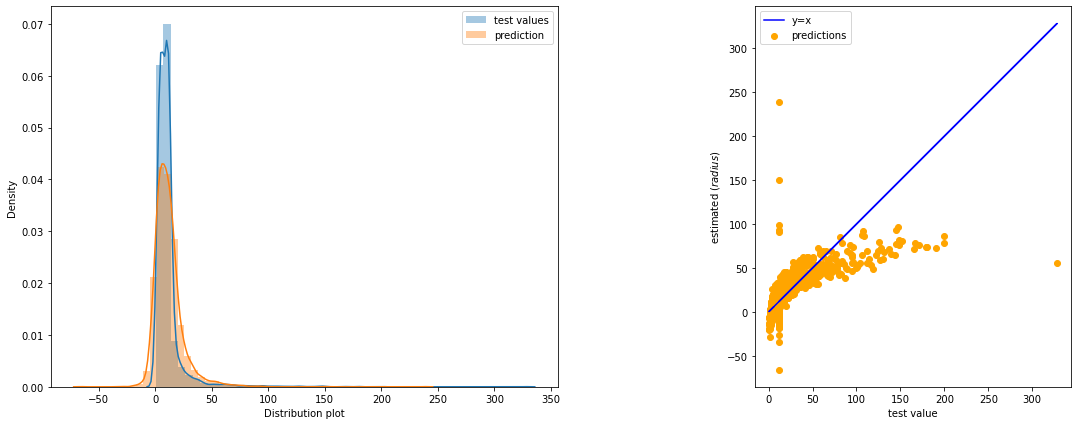

In [48]:
plot(diameterPrediction_linreg)

C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


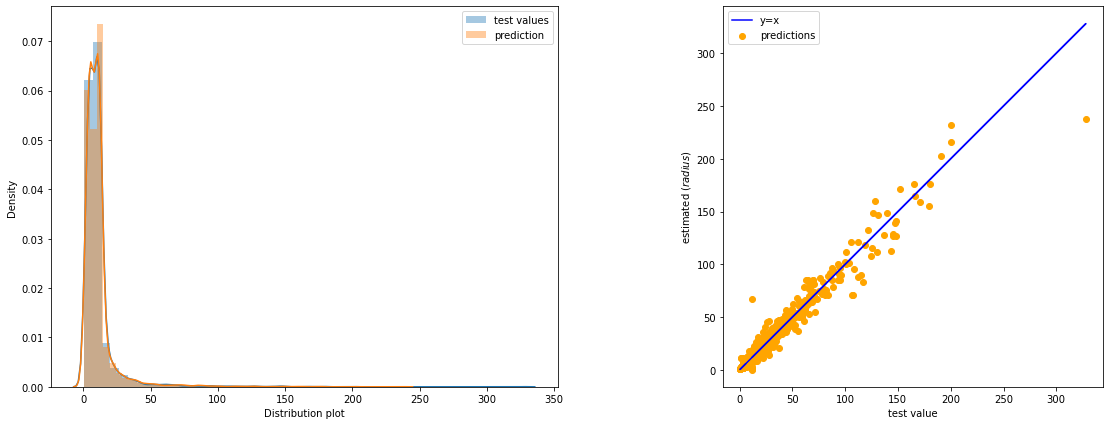

In [49]:
plot(diameterPrediction_dtr)

C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


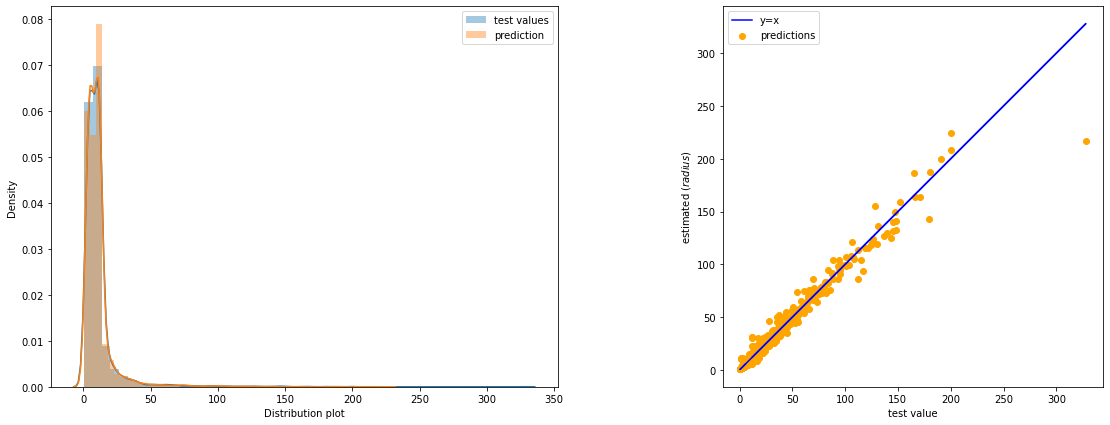

In [50]:
plot(diameterPrediction_rfr)

<AxesSubplot:>

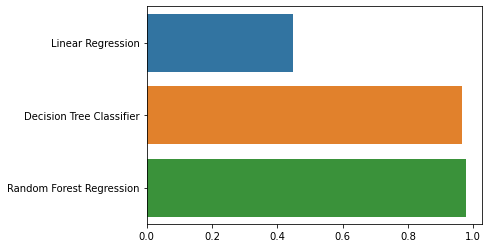

In [55]:
algoritma = ['Linear Regression', 'Decision Tree Classifier', 
             'Random Forest Regression']
scores = [r2_linreg, r2_dtr, r2_rfr]

sns.barplot(y = algoritma, x= scores)

In [65]:
r_2 = pd.DataFrame(data=scores, index=algoritma)
r_2.columns = ['R-squared scores']
r_2

,R-squared scores
Linear Regression,0.448608
Decision Tree Classifier,0.965424
Random Forest Regression,0.976503
